In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths

storage = paths.storage.Storage("toy_retis.nc", "r")

In [3]:
len(storage.samplesets)

893

In [4]:
retis = storage.transitions.load(0)

In [5]:
%%time
storage.samples.cache_all()

CPU times: user 308 ms, sys: 27.1 ms, total: 335 ms
Wall time: 942 ms


### Defining labels

Everything is actually done in terms of ensembles. We can map the ensembles to any labels. In our case, we use the initial replica ID associated with the ensemble. We use this as both the numeric and string label.

In [6]:
sset0 = storage.samplesets[0]
numeric_labels = { s.ensemble : s.replica for s in sset0}
string_label = { s.ensemble : str(s.replica) for s in sset0 }

## Trace of ensemble visited by a replica

In the plot below, you'll see we set the labels on the axis as sset0[e].replica, so we use the replica ID associated with the ensemble in the first timestep.

In [7]:
%%time
trace_1 = paths.trace_ensembles_for_replica(0, storage)

CPU times: user 16.1 s, sys: 176 ms, total: 16.3 s
Wall time: 16.6 s


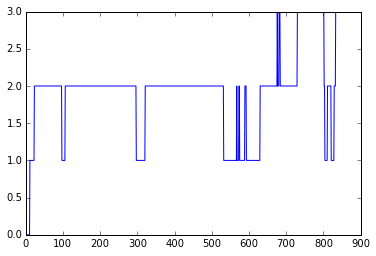

In [8]:
plt.plot([sset0[e].replica for e in trace_1])

### Replica flow

In [9]:
repx_net = paths.ReplicaNetwork(storage=storage)

In [10]:
repx_net.flow(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x10baa5e10>: 1.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10baa08d0>: 0.9411764705882353,
 <openpathsampling.ensemble.TISEnsemble at 0x10baa5c10>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10baba1d0>: 0.987546699875467,
 <openpathsampling.ensemble.TISEnsemble at 0x10babaa90>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10babab50>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10bae5c10>: 0.9511111111111111}

### Trips

Now we calculate "up" trips, "down" trips, and round-trips.

In [11]:
repx_net.trips(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{'down': [], 'round': [], 'up': []}

### Transition matrix

The transition matrix is the (unsymmetrized) matrix of the transition probabilities. By default, it automatically sets its order from the Cuthill-McKee reverse ordering algorithm.

In [12]:
repx_net.transition_matrix()

,-1,0,1,2,3,4,5
-1,0,0.00,0.000000,0.000000,0.000000,0.000,0
0,1,0.00,0.000000,0.000000,0.000000,0.000,0
1,0,0.25,0.000000,0.000000,0.000000,0.000,0
2,0,0.00,0.589744,0.000000,0.000000,0.000,0
3,0,0.00,0.000000,0.176471,0.000000,0.000,0
4,0,0.00,0.000000,0.000000,0.128205,0.000,0
5,0,0.00,0.000000,0.000000,0.000000,0.375,0


If you would like to set a different order, that can be done by providing a list of the ensembles in whatever order you choose:

In [13]:
order = [retis.ensembles[5], retis.ensembles[3], retis.ensembles[1], 
         retis.minus_ensemble, retis.ensembles[4], retis.ensembles[2], 
         retis.ensembles[0]]
repx_net.transition_matrix(index_order=order)

,5,3,1,-1,4,2,0
5,0,0.000000,0.000000,0,0.375,0.000000,0.00
3,0,0.000000,0.000000,0,0.000,0.176471,0.00
1,0,0.000000,0.000000,0,0.000,0.000000,0.25
-1,0,0.000000,0.000000,0,0.000,0.000000,0.00
4,0,0.128205,0.000000,0,0.000,0.000000,0.00
2,0,0.000000,0.589744,0,0.000,0.000000,0.00
0,0,0.000000,0.000000,1,0.000,0.000000,0.00


### Mixing matrix

Same as the transition matrix $T$, but $\frac{1}{2}(T+T^T)$.

In [14]:
repx_net.mixing_matrix()

,-1,0,1,2,3,4,5
-1,0.0,0.500,0.000000,0.000000,0.000000,0.000000,0.0000
0,0.5,0.000,0.125000,0.000000,0.000000,0.000000,0.0000
1,0.0,0.125,0.000000,0.294872,0.000000,0.000000,0.0000
2,0.0,0.000,0.294872,0.000000,0.088235,0.000000,0.0000
3,0.0,0.000,0.000000,0.088235,0.000000,0.064103,0.0000
4,0.0,0.000,0.000000,0.000000,0.064103,0.000000,0.1875
5,0.0,0.000,0.000000,0.000000,0.000000,0.187500,0.0000


### Making a pretty picture

In [15]:
repxG = paths.ReplicaNetworkGraph(repx_net)

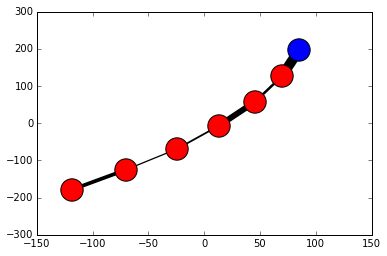

In [16]:
repxG.draw()